# "Optimasi Kinerja Bisnis melalui Analisis Data Pelanggan: Pemahaman Retensi, Eksplorasi RFM, dan Segmentasi"

> Dalam menghadapi era persaingan bisnis yang semakin ketat, perusahaan perlu memahami secara mendalam perilaku pelanggan untuk meningkatkan kinerja bisnisnya. Oleh karena itu, penelitian ini bertujuan untuk mengoptimalkan kinerja bisnis melalui analisis data pelanggan, dengan fokus pada aspek retensi, eksplorasi RFM (Recency, Frequency, Monetary), dan segmentasi. Problem statement dari penelitian ini adalah bagaimana implementasi strategi retensi, penerapan metode RFM, dan pemanfaatan segmentasi data pelanggan dapat secara efektif meningkatkan pemahaman perusahaan terhadap pelanggan, memperkuat hubungan bisnis, dan pada akhirnya, meningkatkan hasil finansial perusahaan.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-eval/sales_data_sample-1.csv


# "Optimasi Kinerja Bisnis melalui Analisis Data Pelanggan: Pemahaman Retensi, Eksplorasi RFM, dan Segmentasi"

> Dalam menghadapi era persaingan bisnis yang semakin ketat, perusahaan perlu memahami secara mendalam perilaku pelanggan untuk meningkatkan kinerja bisnisnya. Oleh karena itu, penelitian ini bertujuan untuk mengoptimalkan kinerja bisnis melalui analisis data pelanggan, dengan fokus pada aspek retensi, eksplorasi RFM (Recency, Frequency, Monetary), dan segmentasi. Problem statement dari penelitian ini adalah bagaimana implementasi strategi retensi, penerapan metode RFM, dan pemanfaatan segmentasi data pelanggan dapat secara efektif meningkatkan pemahaman perusahaan terhadap pelanggan, memperkuat hubungan bisnis, dan pada akhirnya, meningkatkan hasil finansial perusahaan.

In [2]:
data = pd.read_csv('/kaggle/input/sales-eval/sales_data_sample-1.csv', encoding='latin1')
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# 1. Eksplorasi data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
data.isnull().any()


ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
ORDERDATE           False
STATUS              False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
PRODUCTLINE         False
MSRP                False
PRODUCTCODE         False
CUSTOMERNAME        False
PHONE               False
ADDRESSLINE1        False
ADDRESSLINE2         True
CITY                False
STATE                True
POSTALCODE           True
COUNTRY             False
TERRITORY            True
CONTACTLASTNAME     False
CONTACTFIRSTNAME    False
DEALSIZE            False
dtype: bool

# 2. Data Cleansing dan Binning

In [6]:
import pandas as pd

# Membuat kolom 'CUSTOMERID'
data['CUSTOMERID'] = data['CUSTOMERNAME'].astype('category').cat.codes + 1

# Mengubah 'ORDERDATE' menjadi tipe data datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Mengurutkan DataFrame berdasarkan 'CUSTOMERID' dan 'ORDERDATE'
data = data.sort_values(by=['CUSTOMERID', 'ORDERDATE'])

# Menggunakan transform untuk mendapatkan 'JOINDATE' dan 'LASTPURCHASE' yang benar
data['JOINDATE'] = data.groupby('CUSTOMERID')['ORDERDATE'].transform('first')
data['LASTPURCHASE'] = data.groupby('CUSTOMERID')['ORDERDATE'].transform('last')

# Menghapus baris yang sama dengan drop_duplicates
df_cleaned = data[['CUSTOMERID', 'JOINDATE', 'LASTPURCHASE']].drop_duplicates()

# Menambahkan kolom 'order_count' dan 'total_order_value' berdasarkan 'SALES' dan 'QUANTITYORDERED'
df_cleaned['order_count'] = df_cleaned['CUSTOMERID'].map(data.groupby('CUSTOMERID')['ORDERNUMBER'].nunique())
df_cleaned['total_order_value'] = df_cleaned['CUSTOMERID'].map(data.groupby('CUSTOMERID')['SALES'].sum())
df_cleaned['total_quantity_ordered'] = df_cleaned['CUSTOMERID'].map(data.groupby('CUSTOMERID')['QUANTITYORDERED'].sum())

# Menampilkan hasil
print(df_cleaned)


      CUSTOMERID   JOINDATE LASTPURCHASE  order_count  total_order_value  \
527            1 2003-03-18   2004-11-17            3          157807.81   
450            2 2003-07-04   2005-03-28            3           70488.44   
41             3 2004-08-17   2004-09-09            2           94117.26   
451            4 2003-09-11   2005-03-09            4          153996.13   
528            5 2003-05-20   2004-11-25            3           24179.96   
...          ...        ...          ...          ...                ...   
171           88 2004-02-22   2004-08-30            2          117713.56   
475           89 2003-01-10   2004-11-05            3           88041.26   
27            90 2003-03-24   2004-11-19            4           75754.88   
2358          91 2003-12-01   2004-01-29            2           46084.64   
999           92 2004-03-20   2004-11-01            2           78240.84   

      total_quantity_ordered  
527                     1778  
450                      

In [7]:
df_cleaned

,CUSTOMERID,JOINDATE,LASTPURCHASE,order_count,total_order_value,total_quantity_ordered
527,1,2003-03-18,2004-11-17,3,157807.81,1778
450,2,2003-07-04,2005-03-28,3,70488.44,687
41,3,2004-08-17,2004-09-09,2,94117.26,843
451,4,2003-09-11,2005-03-09,4,153996.13,1469
528,5,2003-05-20,2004-11-25,3,24179.96,270
...,...,...,...,...,...,...
171,88,2004-02-22,2004-08-30,2,117713.56,1078
475,89,2003-01-10,2004-11-05,3,88041.26,787
27,90,2003-03-24,2004-11-19,4,75754.88,647
2358,91,2003-12-01,2004-01-29,2,46084.64,511


In [8]:
df_cleaned.duplicated()

527     False
450     False
41      False
451     False
528     False
        ...  
171     False
475     False
27      False
2358    False
999     False
Length: 92, dtype: bool

# 3. User Retention Analysis

In [9]:
import pandas as pd

# Mengganti 'JOINDATE' dan 'LASTPURCHASE' menjadi tipe data datetime jika belum
df_cleaned['JOINDATE'] = pd.to_datetime(df_cleaned['JOINDATE'])
df_cleaned['LASTPURCHASE'] = pd.to_datetime(df_cleaned['LASTPURCHASE'])

# Menghitung retention rate
initial_customers = df_cleaned['JOINDATE'].dt.to_period('M')
retained_customers = df_cleaned['LASTPURCHASE'].dt.to_period('M')

unique_customers = df_cleaned['CUSTOMERID'].nunique()
retained_count = retained_customers.value_counts().sort_index()

retention_rate = (retained_count / unique_customers) * 100

# Menampilkan hasil
print("Retention Rate:")
print(retention_rate)


Retention Rate:
LASTPURCHASE
2004-01     3.260870
2004-02     3.260870
2004-03     2.173913
2004-04     2.173913
2004-05     2.173913
2004-08     3.260870
2004-09     5.434783
2004-10     8.695652
2004-11    21.739130
2004-12     4.347826
2005-01     8.695652
2005-02     4.347826
2005-03     8.695652
2005-04     8.695652
2005-05    13.043478
Freq: M, Name: count, dtype: float64


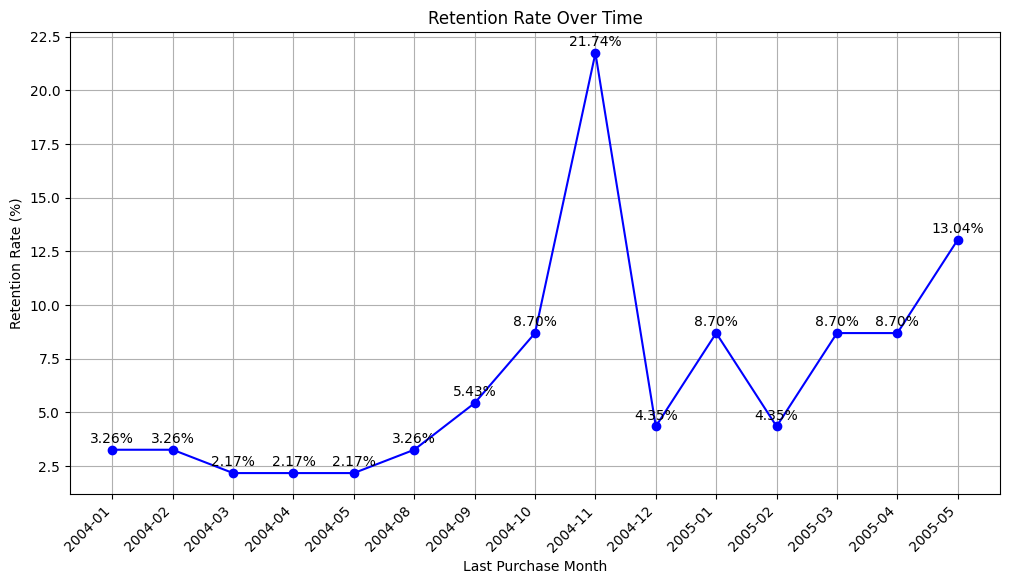

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame
df_cleaned['JOINDATE'] = pd.to_datetime(df_cleaned['JOINDATE'])
df_cleaned['LASTPURCHASE'] = pd.to_datetime(df_cleaned['LASTPURCHASE'])

# Calculate retention rate
initial_customers = df_cleaned['JOINDATE'].dt.to_period('M')
retained_customers = df_cleaned['LASTPURCHASE'].dt.to_period('M')

unique_customers = df_cleaned['CUSTOMERID'].nunique()
retained_count = retained_customers.value_counts().sort_index()

retention_rate = (retained_count / unique_customers) * 100

# Create a DataFrame for plotting
retention_df = pd.DataFrame({
    'LASTPURCHASE': retention_rate.index.astype(str),
    'count': retention_rate.values
})

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(retention_df['LASTPURCHASE'], retention_df['count'], marker='o', linestyle='-', color='b')
plt.title('Retention Rate Over Time')
plt.xlabel('Last Purchase Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')

# Add labels at each point
for i, txt in enumerate(retention_df['count']):
    plt.annotate(f'{txt:.2f}%', (retention_df['LASTPURCHASE'].iloc[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.grid(True)
plt.show()


Retention rate untuk setiap bulan berdasarkan periode LASTPURCHASE. Mari kita analisis hasil ini:

1. **LASTPURCHASE dan Retention Rate:**
   - **2004-01:** Retention rate sebesar 3.26%. Ini menunjukkan bahwa sekitar 3.26% dari pelanggan yang melakukan pembelian pada bulan Desember 2003 tetap melakukan pembelian pada bulan Januari 2004.
   - **2004-02:** Retention rate tetap 3.26%, menunjukkan bahwa persentase pelanggan yang tetap tinggal pada bulan Februari dari bulan Januari tetap sama.
   - **2004-03:** Retention rate turun menjadi 2.17%, yang berarti sekitar 2.17% dari pelanggan yang melakukan pembelian pada bulan Februari tetap melakukan pembelian pada bulan Maret.
   - **2004-04 hingga 2004-05:** Retention rate tetap 2.17%, menunjukkan tingkat retensi yang konsisten selama beberapa bulan tersebut.
   - **2004-08:** Retention rate naik sedikit menjadi 3.26% dari bulan Mei ke Agustus.
   - **2004-09:** Retention rate meningkat lebih signifikan menjadi 5.43% dari bulan Agustus ke September.
   - **2004-10:** Retention rate terus meningkat menjadi 8.70% pada bulan Oktober.
   - **2004-11:** Retention rate mencapai puncaknya pada bulan November dengan 21.74%, menunjukkan peningkatan yang signifikan dalam retensi pelanggan.
   - **2004-12 hingga 2005-05:** Retention rate fluktuatif tetapi tetap relatif tinggi dibandingkan dengan periode sebelumnya. Pada bulan Mei 2005, retention rate mencapai 13.04%.

2. **Analisis Tren:**
   - Terdapat tren peningkatan retention rate dari bulan ke bulan, mencapai puncaknya pada bulan November 2004.
   - Setelah November 2004, retention rate turun, namun tetap relatif tinggi hingga Mei 2005.


# 4. User segmentation and RFM

In [11]:

# Membuat DataFrame dari data
df_user = pd.DataFrame(df_cleaned)

# Mengubah kolom 'JOINDATE' dan 'LASTPURCHASE' menjadi tipe data datetime
df_user['JOINDATE'] = pd.to_datetime(df_user['JOINDATE'])
df_user['LASTPURCHASE'] = pd.to_datetime(df_user['LASTPURCHASE'])

# Menghitung Recency, Frequency, dan Monetary
df_user['day_since_last_order'] = (df_user['LASTPURCHASE'].max() - df_user['LASTPURCHASE']).dt.days

# Recency score
df_user['recency_score'] = pd.cut(df_user['day_since_last_order'],
                                  bins=[-np.inf,
                                        np.percentile(df_user['day_since_last_order'], 20),
                                        np.percentile(df_user['day_since_last_order'], 40),
                                        np.percentile(df_user['day_since_last_order'], 60),
                                        np.percentile(df_user['day_since_last_order'], 80),
                                        np.inf],
                                  labels=[1, 2, 3, 4, 5],
                                  include_lowest=True).astype(int)
df_user

,CUSTOMERID,JOINDATE,LASTPURCHASE,order_count,total_order_value,total_quantity_ordered,day_since_last_order,recency_score
527,1,2003-03-18,2004-11-17,3,157807.81,1778,195,3
450,2,2003-07-04,2005-03-28,3,70488.44,687,64,2
41,3,2004-08-17,2004-09-09,2,94117.26,843,264,5
451,4,2003-09-11,2005-03-09,4,153996.13,1469,83,2
528,5,2003-05-20,2004-11-25,3,24179.96,270,187,3
...,...,...,...,...,...,...,...,...
171,88,2004-02-22,2004-08-30,2,117713.56,1078,274,5
475,89,2003-01-10,2004-11-05,3,88041.26,787,207,4
27,90,2003-03-24,2004-11-19,4,75754.88,647,193,3
2358,91,2003-12-01,2004-01-29,2,46084.64,511,488,5


In [12]:

# Frequency score
df_user['frequency_score'] = pd.cut(df_user['order_count'],
                                    bins=[-np.inf,
                                          np.percentile(df_user['order_count'], 20),
                                          np.percentile(df_user['order_count'], 40),
                                          np.percentile(df_user['order_count'], 60),
                                          np.percentile(df_user['order_count'], 80),
                                          np.inf],
                                    labels=[1, 2, 3, 4],
                                    include_lowest=True, duplicates='drop').astype(int)

df_user

,CUSTOMERID,JOINDATE,LASTPURCHASE,order_count,total_order_value,total_quantity_ordered,day_since_last_order,recency_score,frequency_score
527,1,2003-03-18,2004-11-17,3,157807.81,1778,195,3,2
450,2,2003-07-04,2005-03-28,3,70488.44,687,64,2,2
41,3,2004-08-17,2004-09-09,2,94117.26,843,264,5,1
451,4,2003-09-11,2005-03-09,4,153996.13,1469,83,2,3
528,5,2003-05-20,2004-11-25,3,24179.96,270,187,3,2
...,...,...,...,...,...,...,...,...,...
171,88,2004-02-22,2004-08-30,2,117713.56,1078,274,5,1
475,89,2003-01-10,2004-11-05,3,88041.26,787,207,4,2
27,90,2003-03-24,2004-11-19,4,75754.88,647,193,3,3
2358,91,2003-12-01,2004-01-29,2,46084.64,511,488,5,1


In [13]:
# Monetary score
df_user['monetary_score'] = pd.cut(df_user['total_order_value'],
                                   bins=[-np.inf,
                                         np.percentile(df_user['total_order_value'], 20),
                                         np.percentile(df_user['total_order_value'], 40),
                                         np.percentile(df_user['total_order_value'], 60),
                                         np.percentile(df_user['total_order_value'], 80),
                                         np.inf],
                                   labels=[1, 2, 3, 4, 5],
                                   include_lowest=True).astype(int)
df_user

,CUSTOMERID,JOINDATE,LASTPURCHASE,order_count,total_order_value,total_quantity_ordered,day_since_last_order,recency_score,frequency_score,monetary_score
527,1,2003-03-18,2004-11-17,3,157807.81,1778,195,3,2,5
450,2,2003-07-04,2005-03-28,3,70488.44,687,64,2,2,2
41,3,2004-08-17,2004-09-09,2,94117.26,843,264,5,1,3
451,4,2003-09-11,2005-03-09,4,153996.13,1469,83,2,3,5
528,5,2003-05-20,2004-11-25,3,24179.96,270,187,3,2,1
...,...,...,...,...,...,...,...,...,...,...
171,88,2004-02-22,2004-08-30,2,117713.56,1078,274,5,1,4
475,89,2003-01-10,2004-11-05,3,88041.26,787,207,4,2,3
27,90,2003-03-24,2004-11-19,4,75754.88,647,193,3,3,2
2358,91,2003-12-01,2004-01-29,2,46084.64,511,488,5,1,1


# 4.1 Membuat segmentasi pelanggan

1. **Champion (01-Champion):** Pelanggan dengan skor recency (kebaruan) tertinggi (5) dan skor frequency (frekuensi) 4 atau lebih. Mereka adalah pelanggan yang baru-baru ini bertransaksi dengan frekuensi tinggi, dan dianggap sebagai pelanggan paling berharga.

2. **Loyal Customers (02-Loyal Customers):** Pelanggan dengan skor recency antara 3-4 dan skor frequency 4 atau lebih. Meskipun tidak seaktif Champion, mereka masih merupakan pelanggan yang setia dengan frekuensi tinggi.

3. **Potential Loyalists (03-Potential Loyalists):** Pelanggan dengan skor recency 4 atau lebih dan skor frequency antara 2-3. Mereka belum mencapai frekuensi tinggi seperti Loyal Customers, tetapi memiliki potensi untuk menjadi setia.

4. **Can't Lose Them (04-Can't Lose Them):** Pelanggan dengan skor recency 2 atau kurang dan skor frequency 5. Meskipun tidak bertransaksi baru-baru ini, mereka masih pelanggan berharga dengan frekuensi tinggi.

5. **Need Attention (05-Need Attention):** Pelanggan dengan skor recency 3 dan skor frequency 3. Mereka memerlukan perhatian lebih untuk meningkatkan frekuensi transaksi dan memperpanjang hubungan bisnis.

6. **New Customers (06-New Customers):** Pelanggan dengan skor recency 5 dan skor frequency 1. Mereka baru-baru ini bertransaksi tetapi belum menunjukkan frekuensi tinggi.

7. **Promising (07-Promising):** Pelanggan dengan skor recency 4 dan skor frequency 1. Mereka baru-baru ini bertransaksi tetapi memerlukan strategi untuk meningkatkan frekuensi.

8. **At Risk (08-At Risk):** Pelanggan dengan skor recency 2 atau kurang dan skor frequency antara 3-4. Mereka cenderung meninggalkan bisnis jika tidak diambil tindakan.

9. **About to Sleep (09-About to Sleep):** Pelanggan dengan skor recency 3 dan skor frequency 2 atau kurang. Mereka sudah tidak aktif dan mungkin akan "tidur" (berhenti bertransaksi) jika tidak ada tindakan.

10. **Hibernating (10-Hibernating):** Pelanggan dengan skor recency 2 atau kurang dan skor frequency 2 atau kurang. Mereka adalah pelanggan yang sudah lama tidak bertransaksi dan memerlukan strategi khusus untuk dihidupkan kembali.

In [14]:
import numpy as np

# Hitung recency_score dan frequency_score terlebih dahulu

# Segmentasi RFM
df_user['segment'] = np.select(
    [(df_user['recency_score'] == 5) & (df_user['frequency_score'] >= 4),
     (df_user['recency_score'].between(3, 4)) & (df_user['frequency_score'] >= 4),
     (df_user['recency_score'] >= 4) & (df_user['frequency_score'].between(2, 3)),
     (df_user['recency_score'] <= 2) & (df_user['frequency_score'] == 5),
     (df_user['recency_score'] == 3) & (df_user['frequency_score'] == 3),
     (df_user['recency_score'] == 5) & (df_user['frequency_score'] == 1),
     (df_user['recency_score'] == 4) & (df_user['frequency_score'] == 1),
     (df_user['recency_score'] <= 2) & (df_user['frequency_score'].between(3, 4)),
     (df_user['recency_score'] == 3) & (df_user['frequency_score'] <= 2),
     (df_user['recency_score'] <= 2) & (df_user['frequency_score'] <= 2)],
    ['01-Champion', '02-Loyal Customers', '03-Potential Loyalists', "04-Can't Lose Them", '05-Need Attention',
     '06-New Customers', '07-Promising', '08-At Risk', '09-About to Sleep', '10-Hibernating']
)

df_user

,CUSTOMERID,JOINDATE,LASTPURCHASE,order_count,total_order_value,total_quantity_ordered,day_since_last_order,recency_score,frequency_score,monetary_score,segment
527,1,2003-03-18,2004-11-17,3,157807.81,1778,195,3,2,5,09-About to Sleep
450,2,2003-07-04,2005-03-28,3,70488.44,687,64,2,2,2,10-Hibernating
41,3,2004-08-17,2004-09-09,2,94117.26,843,264,5,1,3,06-New Customers
451,4,2003-09-11,2005-03-09,4,153996.13,1469,83,2,3,5,08-At Risk
528,5,2003-05-20,2004-11-25,3,24179.96,270,187,3,2,1,09-About to Sleep
...,...,...,...,...,...,...,...,...,...,...,...
171,88,2004-02-22,2004-08-30,2,117713.56,1078,274,5,1,4,06-New Customers
475,89,2003-01-10,2004-11-05,3,88041.26,787,207,4,2,3,03-Potential Loyalists
27,90,2003-03-24,2004-11-19,4,75754.88,647,193,3,3,2,05-Need Attention
2358,91,2003-12-01,2004-01-29,2,46084.64,511,488,5,1,1,06-New Customers


In [15]:
import numpy as np

# Membuat dua kelas segmen baru
df_user['new_segment'] = np.select(
    [(df_user['segment'].isin(['01-Champion', '02-Loyal Customers', '03-Potential Loyalists'])),
     (~df_user['segment'].isin(['01-Champion', '02-Loyal Customers', '03-Potential Loyalists']))],
    ['Loyal Custumer', 'Satisfied Customer']
)

# Menampilkan DataFrame dengan kolom baru
df_user

,CUSTOMERID,JOINDATE,LASTPURCHASE,order_count,total_order_value,total_quantity_ordered,day_since_last_order,recency_score,frequency_score,monetary_score,segment,new_segment
527,1,2003-03-18,2004-11-17,3,157807.81,1778,195,3,2,5,09-About to Sleep,Satisfied Customer
450,2,2003-07-04,2005-03-28,3,70488.44,687,64,2,2,2,10-Hibernating,Satisfied Customer
41,3,2004-08-17,2004-09-09,2,94117.26,843,264,5,1,3,06-New Customers,Satisfied Customer
451,4,2003-09-11,2005-03-09,4,153996.13,1469,83,2,3,5,08-At Risk,Satisfied Customer
528,5,2003-05-20,2004-11-25,3,24179.96,270,187,3,2,1,09-About to Sleep,Satisfied Customer
...,...,...,...,...,...,...,...,...,...,...,...,...
171,88,2004-02-22,2004-08-30,2,117713.56,1078,274,5,1,4,06-New Customers,Satisfied Customer
475,89,2003-01-10,2004-11-05,3,88041.26,787,207,4,2,3,03-Potential Loyalists,Loyal Custumer
27,90,2003-03-24,2004-11-19,4,75754.88,647,193,3,3,2,05-Need Attention,Satisfied Customer
2358,91,2003-12-01,2004-01-29,2,46084.64,511,488,5,1,1,06-New Customers,Satisfied Customer


# 5. Visualisasi Data

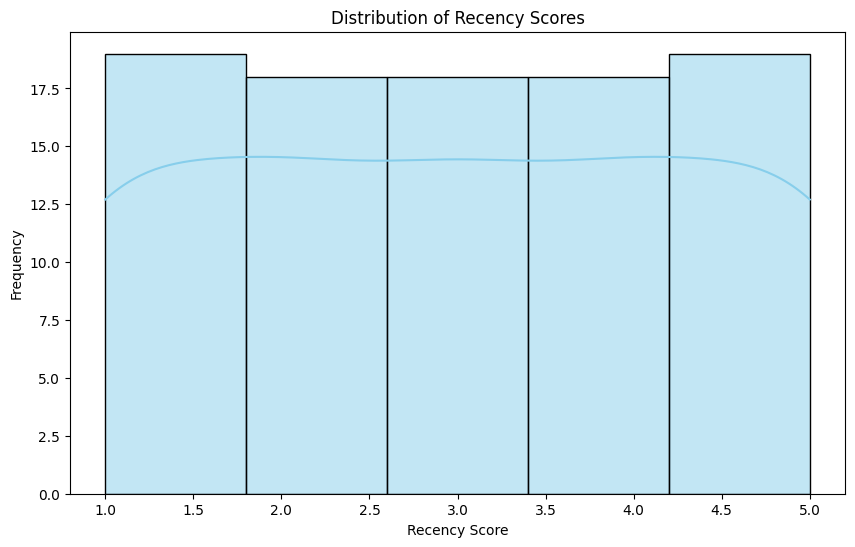

Mean Recency Score: 3.00
Median Recency Score: 3.00

Recency Score Categories:
recency_category
Very Recent    19
Not Recent     19
Recent         18
Neutral        18
Less Recent    18
Name: count, dtype: int64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Distribusi Recency Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_user['recency_score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Recency Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency')
plt.show()

# Analisis Hasil
mean_recency = df_user['recency_score'].mean()
median_recency = df_user['recency_score'].median()

print(f"Mean Recency Score: {mean_recency:.2f}")
print(f"Median Recency Score: {median_recency:.2f}")

# Kategori Recency Score
recency_categories = ['Very Recent', 'Recent', 'Neutral', 'Less Recent', 'Not Recent']
df_user['recency_category'] = pd.cut(df_user['recency_score'], bins=[0, 1, 2, 3, 4, 5], labels=recency_categories)

# Jumlah dalam setiap kategori
recency_category_counts = df_user['recency_category'].value_counts()

print("\nRecency Score Categories:")
print(recency_category_counts)


Analisis Distribusi dan Kategori Recency Scores:

Dari visualisasi distribusi recency_score, kita dapat mengamati bahwa mayoritas pengguna memiliki skor recency di sekitar nilai tengah, dengan sebaran yang cukup merata. Mean recency_score sebesar 3.00 menunjukkan bahwa secara rata-rata pengguna melakukan pembelian atau interaksi baru-baru ini, sedangkan median yang sama menunjukkan pusat distribusi skor.

Ketika membagi recency_score ke dalam kategori, kita dapat melihat bahwa sekitar 19 pengguna termasuk dalam kategori "Very Recent" dan "Not Recent", menunjukkan bahwa sebagian besar pengguna memiliki perilaku pembelian atau interaksi yang baru-baru ini atau sebaliknya. Sedangkan, jumlah pengguna dalam kategori "Recent", "Neutral", dan "Less Recent" hampir seragam, masing-masing sekitar 18 pengguna. Hal ini menunjukkan variasi dalam keaktifan pengguna dengan skor recency yang berbeda.

Secara keseluruhan, distribusi recency_score mengindikasikan bahwa sebagian besar pengguna cenderung memiliki keaktifan yang seimbang, baik yang baru-baru ini maupun yang tidak baru-baru ini. Analisis ini memberikan pemahaman yang lebih mendalam tentang sebaran recency_score dan dapat menjadi dasar untuk strategi pemasaran atau retensi pelanggan yang lebih terarah.

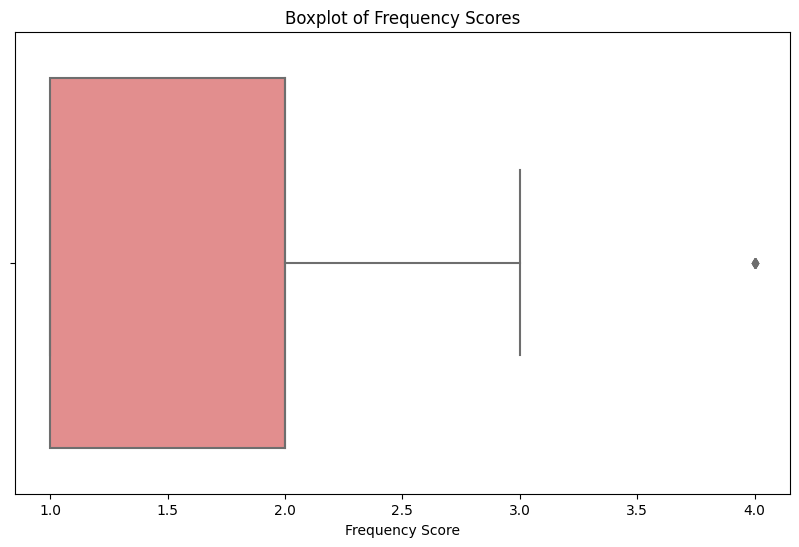

Jumlah outliers: 6
Outliers:
     CUSTOMERID  frequency_score
55            7                4
106          28                4
187          32                4
266          34                4
213          56                4
1            67                4


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi boxplot untuk frequency_score
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_user['frequency_score'], color='lightcoral')
plt.title('Boxplot of Frequency Scores')
plt.xlabel('Frequency Score')
plt.show()

# Analisis outliers
Q1 = df_user['frequency_score'].quantile(0.25)
Q3 = df_user['frequency_score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_user[(df_user['frequency_score'] < lower_bound) | (df_user['frequency_score'] > upper_bound)]

print(f"Jumlah outliers: {len(outliers)}")
print("Outliers:")
print(outliers[['CUSTOMERID', 'frequency_score']])


Dari hasil ini, terdapat 6 data pelanggan yang memiliki nilai frequency_score di atas batas atas yang ditentukan oleh metode IQR. Hal ini menunjukkan bahwa kelompok pelanggan ini memiliki frekuensi pembelian yang lebih tinggi dibandingkan dengan sebagian besar pelanggan lainnya. Hal ini dapat menjadi fokus untuk analisis lebih lanjut, seperti menentukan apakah kelompok ini memiliki keunikan tertentu yang dapat dimanfaatkan atau apakah ada faktor khusus yang menyebabkan frekuensi pembelian yang tinggi.

segment
10-Hibernating            22
06-New Customers          17
08-At Risk                15
09-About to Sleep         14
07-Promising              11
03-Potential Loyalists     9
05-Need Attention          3
02-Loyal Customers         1
Name: count, dtype: int64


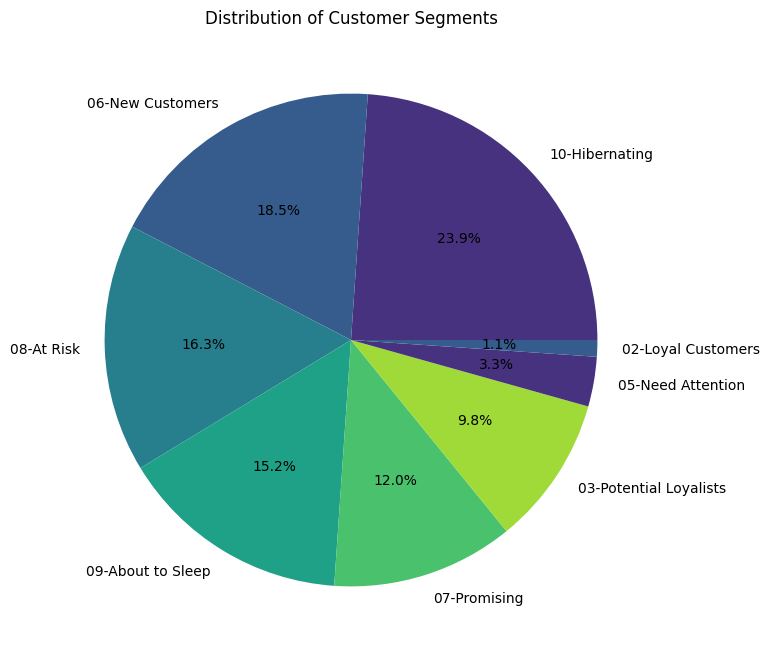

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung frekuensi setiap segment
segment_counts = df_user['segment'].value_counts()
print (segment_counts)
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Customer Segments')
plt.show()


hasil analisis dari distribusi segment:

1. **10-Hibernating:** Terdapat 22 pelanggan dalam kategori ini. Pelanggan-pelanggan ini mungkin tidak aktif dalam jangka waktu tertentu dan memerlukan strategi untuk membangunkan kembali keterlibatan mereka.

2. **06-New Customers:** Terdapat 17 pelanggan yang termasuk dalam kategori pelanggan baru. Strategi pemasaran yang efektif dapat diterapkan untuk membuat pelanggan baru ini tetap terlibat.

3. **08-At Risk:** Terdapat 15 pelanggan yang masuk dalam kategori risiko. Perhatian khusus mungkin diperlukan untuk mencegah mereka menjadi pelanggan yang tidak aktif.

4. **09-About to Sleep:** Ada 14 pelanggan yang masuk ke dalam kategori ini. Tindakan pencegahan mungkin diperlukan untuk mencegah mereka berpindah ke kategori "Hibernating".

5. **07-Promising:** Kategori "Promising" memiliki 11 pelanggan. Pelanggan-pelanggan ini menunjukkan potensi, dan strategi retensi dapat diterapkan untuk menjaga mereka tetap terlibat.

6. **03-Potential Loyalists:** Ada 9 pelanggan dalam kategori potensial sebagai pelanggan loyal. Strategi dapat difokuskan untuk meningkatkan loyalitas mereka.

7. **05-Need Attention:** Hanya ada 3 pelanggan dalam kategori ini. Meskipun jumlahnya sedikit, perhatian khusus mungkin diperlukan untuk memahami dan memenuhi kebutuhan mereka.

8. **02-Loyal Customers:** Kategori ini memiliki 1 pelanggan. Meskipun jumlahnya kecil, pelanggan ini mungkin menjadi pelanggan yang sangat berharga yang perlu dijaga dengan baik.

Dengan memahami distribusi segmentasi, perusahaan dapat mengambil langkah-langkah yang sesuai untuk memperkuat hubungan dengan pelanggan dan meningkatkan retensi pelanggan.

1. **10-Hibernating:**
   - Strategi pemasaran yang kreatif untuk membangunkan kembali minat pelanggan.
   - Penawaran khusus atau diskon untuk mendorong pembelian kembali.
   - Survei kepuasan pelanggan untuk memahami alasannya menjadi tidak aktif.

2. **06-New Customers:**
   - Sambutan yang hangat dan penawaran spesial untuk meningkatkan pengalaman pelanggan baru.
   - Program loyalitas untuk mendorong pembelian berulang.
   - Komunikasi reguler untuk membangun kesetiaan.

3. **08-At Risk:**
   - Program insentif atau diskon untuk mencegah pelanggan beralih.
   - Komunikasi proaktif untuk memahami kekhawatiran mereka.
   - Evaluasi pengalaman pelanggan untuk menemukan penyebab ketidakpuasan.

4. **09-About to Sleep:**
   - Promosi khusus atau keuntungan tambahan untuk mencegah pelanggan menjadi tidak aktif.
   - Kontak personal atau survei untuk memahami perubahan perilaku.

5. **07-Promising:**
   - Penawaran eksklusif untuk mendorong pembelian lebih lanjut.
   - Program referral untuk mengajak teman atau keluarga.
   - Pemantauan aktif dan umpan balik untuk memastikan kepuasan.

6. **03-Potential Loyalists:**
   - Program loyalitas dan insentif untuk mempertahankan mereka sebagai pelanggan setia.
   - Penawaran khusus untuk meningkatkan nilai sepanjang waktu.
   - Hubungan pelanggan yang personal dan responsif.

7. **05-Need Attention:**
   - Survei kepuasan pelanggan untuk mengidentifikasi permasalahan.
   - Layanan pelanggan yang intensif untuk memenuhi kebutuhan mereka.
   - Strategi pemasaran yang dikustomisasi untuk meningkatkan keterlibatan.

8. **02-Loyal Customers:**
   - Penghargaan eksklusif atau manfaat tambahan sebagai bentuk penghargaan.
   - Program loyalitas yang dirancang khusus untuk mereka.
   - Komunikasi reguler untuk memastikan kepuasan berkelanjutan.